<h1 style="text-align: center;">TensorFlow</h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt

seed = 7777
tf.random.set_seed(seed)

In [17]:
import warnings
import re

# Solo filtra la advertencia específica sobre input_shape en Sequential
warnings.filterwarnings(
    "ignore",
    message=re.escape("Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead."),
    category=UserWarning
)

# Tensores y variables
TensorFlow opera en arreglos multidimensionales o **tensores** representados como objetos `tf.Tensor`.
Tiene las caracterisiticas de:
* `Tensor.shape`: te dice las dimensiones de estos *tensores*.
    * ⚠️ Deben ser matrices rectangulares
* `Tensor.dtype`: te dice el tipo de todos los elementos del *tensor. 
    * ⚠️ Todos los valores deben ser del mismo tipo


 Estos *tensores* son *matrices multidimensionales* que ademas se comportan de una forma muy parecida a los de `nunpy`:

* Con respecto a los cálculos matemáticos:

| Tipo de cálculo / operación            | ¿Es similar? | NumPy (`np.ndarray`)      | TensorFlow (`tf.Tensor`)                                      | Notas                               |
| -------------------------------------- | ------------ | ------------------------- | ------------------------------------------------------------- | ----------------------------------- |
| **Suma de arrays/matrices**            | ✅ Sí         | `a + b`                   | `a + b`                                                       | Idéntica                            |
| **Resta de arrays/matrices**           | ✅ Sí         | `a - b`                   | `a - b`                                                       | Idéntica                            |
| **Multiplicación elemento a elemento** | ✅ Sí         | `a * b`                   | `a * b`                                                       | Igual                               |
| **Producto matricial (dot product)**   | ✅ Sí         | `np.dot(a, b)`            | `tf.matmul(a, b)`                                             | Función diferente                   |
| **Transposición**                      | ✅ Sí         | `a.T` o `np.transpose(a)` | `tf.transpose(a)`                                             | Sintaxis parecida                   |
| **Slicing / Indexing**                 | ✅ Sí         | `a[0, :]`                 | `a[0, :]`                                                     | Idéntica                            |
| **Broadcasting**                       | ✅ Sí         | Automático                | Automático                                                    | Muy parecido                        |
| **Suma por ejes (axis)**               | ✅ Sí         | `np.sum(a, axis=0)`       | `tf.reduce_sum(a, axis=0)`                                    | Funciones distintas                 |
| **Mean / promedio**                    | ✅ Sí         | `np.mean(a)`              | `tf.reduce_mean(a)`                                           | Diferente nombre                    |
| **Varianza / desviación típica**       | ✅ Sí         | `np.var(a)`               | `tf.math.reduce_variance(a)`                                  | TF usa `tf.math`                    |
| **Funciones trigonométricas**          | ✅ Sí         | `np.sin(a)`               | `tf.math.sin(a)`                                              | Misma lógica                        |
| **Funciones log, exp, sqrt, etc.**     | ✅ Sí         | `np.log(a)`               | `tf.math.log(a)`                                              | Prefijo `math.`                     |
| **Reshape / cambio de forma**          | ✅ Sí         | `a.reshape((2, 4))`       | `tf.reshape(a, (2, 4))`                                       | Igual                               |
| **Stack / concat / split**             | ✅ Sí         | `np.concatenate([...])`   | `tf.concat([...])`                                            | Igual lógica                        |
| **Argmax / argmin**                    | ✅ Sí         | `np.argmax(a)`            | `tf.argmax(a)`                                                | Igual                               |
| **Sort / argsort**                     | ✅ Sí         | `np.sort(a)`              | `tf.sort(a)`                                                  | Igual                               |
| **Boolean masking / filtrado**         | ✅ Sí         | `a[a > 0]`                | `tf.boolean_mask(a, a > 0)`                                   | Similar pero con función específica |
| **Operaciones en GPU**                 | ❌ No         | ❌ No                      | ✅ Sí (automático)                                             | Gran diferencia                     |
| **Autodiferenciación (gradientes)**    | ❌ No         | ❌ No                      | ✅ Sí (`tf.GradientTape`)                                      | Solo TF                             |
| **Ejecución simbólica / gráfica**      | ❌ No         | ❌ No                      | ✅ Sí (modo gráfico o eager)                                   | Solo TF                             |
| **Mutabilidad (modificar valores)**    | ❌ No         | ✅ Sí (`a[0,0] = 5`)       | ❌ No (`tf.Tensor` es inmutable)                               | Solo mutable en NumPy               |
| **Conversión a lista**                 | ✅ Sí         | `a.tolist()`              | `a.numpy().tolist()`                                          | En TF necesitas `.numpy()` primero  |
| **Guardar en disco (formato nativo)**  | ✅ Similar    | `np.save()` / `np.load()` | `tf.saved_model` (modelos), o `.numpy()` para exportar arrays | Diferente enfoque                   |

Y con respecto a sus caracteristicas:

| Característica                   | **NumPy array**            | **TensorFlow tensor**                         |
| -------------------------------- | -------------------------- | --------------------------------------------- |
| Tipo                             | `numpy.ndarray`            | `tf.Tensor`                                   |
| Biblioteca                       | NumPy                      | TensorFlow                                    |
| Uso principal                    | Cálculo científico general | Computación automática (ML/DL)                |
| Soporte para GPU                 | ❌ No (solo CPU)            | ✅ Sí (GPU, TPU, CPU)                          |
| Diferenciación automática        | ❌ No                       | ✅ Sí (con `tf.GradientTape`)                  |
| Computación simbólica            | ❌ No                       | ✅ Sí (gráficos computacionales)               |
| Inmutabilidad                    | ✅ Mutable                  | ⚠️ Inmutable (no puedes cambiar su contenido) |
| Integración con redes neuronales | ❌ No directo               | ✅ Nativo (keras, optimizers, etc.)            |


## Tensor constants

In [2]:
# scalar
scalar = tf.constant(18)
print(scalar)
print(scalar.shape)

# Vector
vector = tf.constant([17, 12])
print(vector)
print(vector.shape)

# Matrices
matrix = tf.constant([[1, 2],
                      [3, 4]])
print(matrix)
print(matrix.shape)

# Tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]]])

tf.Tensor(18, shape=(), dtype=int32)
()
tf.Tensor([17 12], shape=(2,), dtype=int32)
(2,)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
(2, 2)


# First Neural Network in Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Input
Para definir la usamos el objeto `Input`. Debe ser el numero de variables independientes.
* `shape`: dimensión de entrada, tiene que estar en el formato de (input_dimension,)

## Dense
Podemos crear capas *completamente conectadas* usando la clase `Dense`. 
Tiene lso siguientes parametros:
* `units`: Número de neuronas en esa capa.
* `activation`: Función de activación que usaremos. Por defecto está la función *lineal* .
* `name`: Es interesante poner el nombre de cada capa para poder identificarlas.
* `input_shape`: En caso de no querer usar el objeto `Input`, podemos incluir una primera capa que tenga este atributo.

## Sequential
El objeto `Sequential` <u> es donde vamos a crear nuestra red neuronal </u>. Tenemos dos formas para crearlo:
1. * Crear el objeto
    * Vamos añadiendo las capas con el método **.add** a nuestro objeto
    * Recordar que la primera capa debe ser `Input` o `Dense`(con el atributo de *input_shape*)
2. * Podemos guardar directamente el modelo con todas las capas guardadas en una lista.
    * Además también se pueden añadir más capas.

In [19]:
model1 = keras.Sequential()
model1.add(layers.Dense(3, activation="sigmoid", name="input_lay", input_shape=(2,)))
model1.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

model2 = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(3, activation="sigmoid", name="input_layer"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
])

# Guardar y cargar modelos de Keras
## Guardar modelo
Puedes guardar facilmente tu modelo entero (arquitectura, pesos, optimizer state) usando el método `save` y ponemos el nombre del archivo que lo queremos guardar, importante poner el sufijo ".keras" o ".h5".
* .keras: El modo recomnedado y por defecto para TenserFlow 2.12. Incluye metadata del modelo y es "future-proof".
* .h5: Es muy usado y es muy simple.

`model1.save("Modelo_Keras.keras")`

`model1.save("Modelo2_Keras.h5")`

## Cargar un modelo. 
Simplemente debemos llamar a la funcion `load_model` y escribir el nombre del archivo donde esté guardado el modelo


In [6]:
from tensorflow.keras.models import load_model

modelo_cargado = load_model("Modelo_Keras.keras")

# MNIST

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

seed = 7777
tf.random.set_seed(seed)

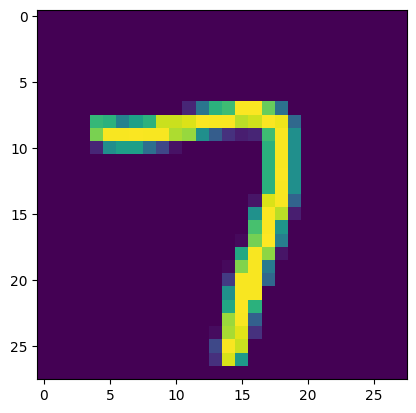

In [8]:
# Cargo el datset
mnist = tf.keras.datasets.mnist   

# Pongo los valores de train y test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Como son valores de 0 a 255 puedo normalizarlo dividiendo entre 255
X_train, X_test = X_train/255.0, X_test/255.0

i_rand = np.random.randint(0, len(X_train))
plt.imshow(X_train[i_rand])
plt.show()

Ahora vamos a hacer más pequeño nuestro dataset de test para que tengamos aun mas **OVERFITTING**.
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import train_test_split

_, X, _, y = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)

## Creación del modelo
Vamos a crear un modelo que sea capaz de generalizar. Nuestro modelo consistirá en :
* Input de dimensión 28,28
* Capa de flatten (para así tener los datos en una lista)
* 3 Dense hidden layer 
* Output layer con una sola neurona

In [15]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(128, activation="relu", name="layer_2")(l_1)
l_3 = layers.Dense(128, activation="relu", name="layer_3")(l_2)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(l_3)

# Definimos el modelo
model = keras.Model(inputs=inputs, outputs=outputs, name="try_not_overfit")

model.summary()


Model: "try_not_overfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

Ahora usaremos la siguiente configuración para entrenar:

In [16]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
                    X, y,
                    batch_size=64,
                    epochs=100,
                    validation_split=0.2,
                    shuffle=True
)
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7092 - loss: 0.9929 - val_accuracy: 0.9154 - val_loss: 0.3080
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9276 - loss: 0.2442 - val_accuracy: 0.9350 - val_loss: 0.2270
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9570 - loss: 0.1504 - val_accuracy: 0.9458 - val_loss: 0.1943
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9717 - loss: 0.0995 - val_accuracy: 0.9429 - val_loss: 0.2060
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9805 - loss: 0.0674 - val_accuracy: 0.9371 - val_loss: 0.2439
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9846 - loss: 0.0540 - val_accuracy: 0.9500 - val_loss: 0.2030
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9550 - val_loss: 0.1739
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9926 - loss: 0.0219 - val

Ahora vamos a evaluar los valores en cada *epoch* de la función de perdida y la *accuracy*

In [ ]:
def show_loss_accuracy_evolution(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("loss")
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(history)

## Crear un modelo mas simple
Una de las formas para prevenir el sobreajuste es creando un modelo más sencillo -> crear un modelo con menos numero de paramtros -> el cuál está determinado por el número de neuronas por capa.

Un modelo más complejo es capaz de aprender casi cualquier cosa de los datos de entrenamiento: **INCLUSO LA ALEATORIEDAD**

In [ ]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(8, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(8, activation="relu", name="layer_2")(l_1)

outputs = layers.Dense(1, activation="softmax", name="output_layer")(l_2)

# Definimos el modelo
model_simpler = keras.Model(input=inputs, output=outputs, name="try not overfit")
model_simpler.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_simpler = model_simpler.fit(X,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.25,
                                    shuffle=True)

show_loss_accuracy_evolution(history_simpler)

## Reduciendo el `batch_size`
Otro método es disminuyendo el tamaño del *batch* durante el *gradient descent* para así tener más incertidumbre a la hora de estimar los **parametros del gradiente**


In [ ]:
inputs = tf.keras.Input(shape=(28,28), name=("input_layer"))

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation="relu", name="layer_1")(flat)
l_2 = layers.Dense(128, activation="relu", name="layer_2")(l_1)
l_3 = layers.Dense(128, activation="relu", name="layer_3")(l_2)

outputs = layers.Dense(1, activation="softmax", name="output_layer")(l_3)

model = keras.Model(input=inputs, output=outputs, name="try not overfit")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)
show_loss_accuracy_evolution(history_2)


results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

## Dropout
Este método se aplica a una (o varias capas), y consiste en *"dropping out"* un número de neuronas de la capa. Para crear una capa que tenga *dropout* tendremos que usar el objeto `Dropout`.
* `rate`: float entre [0, 1], indica la fracción de las neuronas que se van a "dropout"
* `noise_shape`: 
* `seed`: semilla

In [ ]:
# Objeto
tf.keras.layers.Dropout(0.3, seed=seed)

# Con functional API
prev_layer = layers.Dense(2)
layer = layers.Dropout(0.3, seed=seed)(prev_layer)

# Con `Sequential`
model.add(layers.Dropout(0.3, seed=seed))

Por ello, en nuestro ejemplo nos quedará:

In [ ]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)
flat = layers.Dropout(0.5, name='dropout_flat')(flat)

l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5, name='dropout_l3')(l_3)


outputs = layers.Dense(10, activation='softmax',
                       name='output_layer')(l_3)


model_dropout = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout')
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)
    
show_loss_accuracy_evolution(history_dropout)

## Batch Normalization
`BatchNormalization` aplica una transformación que hace que la salida tenga una media cerca de 0 y una std deviation cerca de 1

In [ ]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)


l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)


outputs = layers.Dense(10, activation='softmax',
                       name='output_layer')(l_3)


model_batch_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_batch_norm')
model_batch_norm.summary()
model_batch_norm.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_batch_norm = model_batch_norm.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)
    
show_loss_accuracy_evolution(history_batch_norm)

## Layer Normalization
`LayerNormalization` es otro tipo de normalización. A diferencia de `BatchNormalization`, esto normaliza los datos a traves de todas las *features* y no depende del tamaño del *batch*, siendo así efectivo para *training* e *inferencia*.
Calcula la media y la varianza 

In [ ]:
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

flat = layers.Flatten()(inputs)

l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)

l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(l_3)

model_layer_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_layer_norm')
model_layer_norm.summary()
model_layer_norm.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_layer_norm = model_layer_norm.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True)
    
show_loss_accuracy_evolution(history_layer_norm)